In [1]:
import os
import pandas as pd
import numpy_financial
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

original_cwd = os.getcwd()
os.chdir("../scripts")
from population import within_radius_mask
from file_management import tif_data
os.chdir(original_cwd)

In [2]:
abc = 'abcdefgh'
all_countries = [
    'AT', 'BE', 'BG', 'CZ', 'DE', 
    'DK', 'EE', 'EL', 'ES', 'FI', 
    'FR', 'HR', 'HU', 'IE', 'IT', 
    'LT', 'LU', 'LV', 'NL', 'PL',
    'PT', 'RO', 'SE', 'SI', 'SK'
]
countries = all_countries

# Input

In [3]:
params = {
    'capacity': 2, # MW
    'invest': 963000, # €/MW
    'cost_qfix': 11340, # €/MW/year
    'lifetime': 30, # years
    'wacc': 0.073,  
    'availability': 0.9
}

In [4]:
turbines = pd.DataFrame()
for c in countries:
    tmp = pd.read_csv(f"../build/turbines-{c}.csv", index_col=0)[
        ['lcoe_eur_per_mwh', 'disamenity_cost_eur_per_mwh', '1', '2', '3', '4']
    ]
    tmp.columns = ['engineering', 'disamenity', 1, 2, 3, 4]
    tmp['disamenity'] = tmp['disamenity']
    tmp[c] = 2
    turbines = turbines.append(tmp)
    
turbines.sum()

engineering    2.429726e+08
disamenity     8.380455e+06
1              9.186601e+08
2              3.561010e+09
3              6.792235e+09
4              1.002282e+10
AT             1.625540e+05
BE             4.604000e+04
BG             2.879340e+05
CZ             2.638600e+05
DE             5.939140e+05
DK             9.528000e+03
EE             1.054380e+05
EL             3.314960e+05
ES             1.647420e+06
FI             1.400964e+06
FR             1.894978e+06
HR             1.456780e+05
HU             2.853160e+05
IE             2.572140e+05
IT             8.463520e+05
LT             2.618140e+05
LU             1.784000e+03
LV             2.988160e+05
NL             1.228220e+05
PL             9.158980e+05
PT             3.681720e+05
RO             8.359020e+05
SE             1.703574e+06
SI             2.642200e+04
SK             1.178680e+05
dtype: float64

In [5]:
turbines['DE'].sum()/1000

593.914

In [6]:
DE_capacities = {
    '1-200m': 480,
    '2-1000m': 317,
    '3-200m': 480,
    '4-1000m': 317,
    '5-200m': 40
}   

In [13]:
targets = pd.read_csv(f"../data/EU_wind_capacities_2050.csv", index_col=0)['0'] / 1000 
targets

AT      9.635319
BE      7.313586
BG      2.768476
CY      0.512958
CZ      3.846454
DE    105.519338
DK      9.937161
EE      1.166831
EL      9.932954
ES     64.122135
FI      9.319734
FR     66.062757
HR      2.334318
HU      3.131698
IE      8.054294
IT     26.003972
LT      2.271274
LU      0.630298
LV      0.950137
MT      0.000000
NL     25.198052
PL     14.695300
PT     11.990232
RO     10.572279
SE     14.511699
SI      0.312270
SK      1.821950
Name: 0, dtype: float64

# Section 2

In [7]:
weights3 = within_radius_mask(3)

C:\Users\olive\AppData\Local\Temp/ipykernel_19956/4066745719.py:7: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(range(-4,4))
C:\Users\olive\AppData\Local\Temp/ipykernel_19956/4066745719.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(range(-4,4))


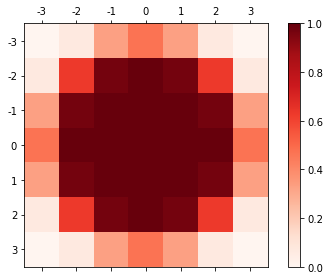

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)

cmap=plt.get_cmap('Reds')
cax = ax.matshow(weights3.astype(float), cmap = cmap)
fig.colorbar(cax)
ax.set_xticklabels(range(-4,4))
ax.set_yticklabels(range(-4,4))

plt.tight_layout()
plt.savefig('Figure 2.png', dpi=300)

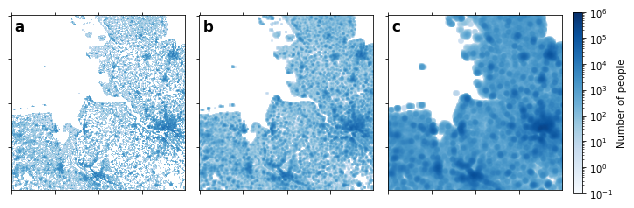

In [9]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), sharex='col', gridspec_kw={'width_ratios': [4,4,5]})

cmap=plt.get_cmap('Blues')

for i, file in enumerate(['data/population/JRC_1K_POP_2018', 'population-within-1km', 'population-within-3km']):
    cax = ax[i].matshow(
        tif_data(f'../build/{file}.tif', replace_nodata=0)[1900:2100, 3200:3400].astype(float), 
        cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1_000_000)
    )
    ax[i].text(0.02, 0.98, abc[i], transform=ax[i].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Number of people')

plt.tight_layout()
plt.savefig('Figure 3.png', dpi=300)

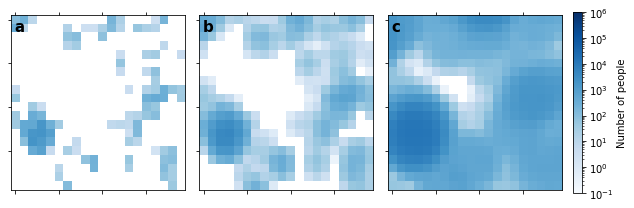

In [10]:
fig, ax = plt.subplots(1, 3, figsize=(9,3), sharex='col', gridspec_kw={'width_ratios': [4,4,5]})

cmap=plt.get_cmap('Blues')

for i, file in enumerate(['data/population/JRC_1K_POP_2018', 'population-within-1km', 'population-within-3km']):
    cax = ax[i].matshow(
        tif_data(f'../build/{file}.tif', replace_nodata=0)[2080:2100, 3380:3400].astype(float), 
        cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1_000_000)
    )
    ax[i].text(0.02, 0.98, abc[i], transform=ax[i].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Number of people')

plt.tight_layout()

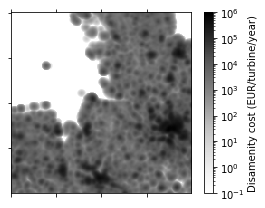

In [11]:
fig = plt.figure(figsize=(4,3))
ax = fig.add_subplot(111)
cmap=plt.get_cmap('Greys')
cax = ax.matshow(
    tif_data('../build/disamenity-cost.tif', replace_nodata=0)[1900:2100, 3200:3400].astype(float), 
    cmap = cmap, norm=LogNorm(vmin=0.1, vmax=1000000)
)
ax.set_xticklabels([])
ax.set_yticklabels([])

cbar = fig.colorbar(cax)
cbar.set_label('Disamenity cost (EUR/turbine/year)')

plt.tight_layout()
plt.savefig('Figure 4.png', dpi=300)

# Subsection 3.1

Cost potential curves

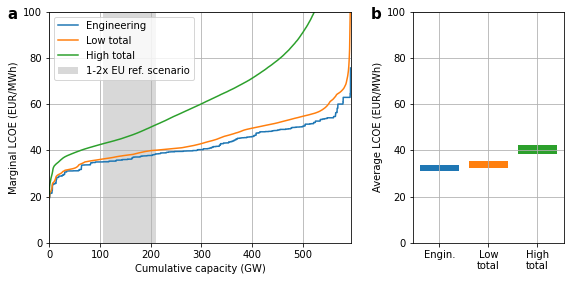

In [151]:
c = 'DE'

fig, ax = plt.subplots(1, 2, figsize=(8, 4), sharex='col', gridspec_kw={'width_ratios': [4,2]})

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = tmp[c].cumsum() / 1000
engineering_cost = tmp['engineering'].sort_values()
total_cost_low = (tmp['engineering'] + tmp['disamenity']).sort_values()
total_cost_high = (tmp['engineering'] + 10 * tmp['disamenity']).sort_values()

ax[0].text(-0.14, 1.02, 'a', transform=ax[0].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

ax[0].plot(cumulative_capacity, engineering_cost, label='Engineering')
ax[0].plot(cumulative_capacity, total_cost_low, label='Low total')
ax[0].plot(cumulative_capacity, total_cost_high, label='High total')

ax[0].fill_between([targets[c], 2*targets[c]], [0,0], [100,100], facecolor='grey', alpha=0.3, label='1-2x EU ref. scenario')

#ax[0].legend(loc='center right', bbox_to_anchor=(1.6,0.5))

ax[0].legend(loc='upper left')

ax[0].set_xlabel('Cumulative capacity (GW)')
ax[0].set_ylabel('Marginal LCOE (EUR/MWh)')
ax[0].set_xlim(0, cumulative_capacity.iloc[-1])
ax[0].set_ylim(0, 100)
ax[0].grid()

ax[1].text(-0.28, 1.02, 'b', transform=ax[1].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

for i, df in enumerate([engineering_cost, total_cost_low, total_cost_high]):
    ax[1].bar(
        i, 
        df.iloc[:int(targets[c]/2*1000*2)].mean()-df.iloc[:int(targets[c]/2*1000)].mean(),
        bottom=df.iloc[:int(targets[c]/2*1000)].mean()
    )
#ax[1].text(1, 20, 'Lower end: 1x EU\nreference scenario', ha='center', va='center', bbox={'facecolor': 'white', 'edgecolor': 'grey'})
#ax[1].text(1, 55, 'Upper end: 2x EU\nreference scenario', ha='center', va='center', bbox={'facecolor': 'white', 'edgecolor': 'grey'})
ax[1].set_xticks([0, 1, 2])
ax[1].set_xticklabels(['Engin.','Low\ntotal','High\ntotal'])
ax[1].set_ylim(0, 100)
ax[1].set_ylabel('\nAverage LCOE (EUR/MWh)')
ax[1].grid()

plt.tight_layout()
plt.savefig('Figure 5.png', dpi=300)

In [41]:
tmp['disamenity'].mean() / tmp['engineering'].mean()

0.06648298098058411

In [45]:
tmp =  pd.DataFrame({
    'full': {
        'engineering': engineering_cost.mean().round(),
        'total low': total_cost_low.mean().round(),
        'total high': total_cost_high.mean().round(),
    },
    '1x EU reference scenario (marginal)': {
        'engineering': engineering_cost.iloc[int(targets[c]/2*1000)].round(1),
        'total low': total_cost_low.iloc[int(targets[c]/2*1000)].round(),
        'total high': total_cost_high.iloc[int(targets[c]/2*1000)].round(),
    },
    '2x EU reference scenario (marginal)': {
        'engineering': engineering_cost.iloc[int(targets[c]/2*1000*2)].round(1),
        'total low': total_cost_low.iloc[int(targets[c]/2*1000*2)].round(),
        'total high': total_cost_high.iloc[int(targets[c]/2*1000*2)].round(),
    },
    '1x EU reference scenario (mean)': {
        'engineering': engineering_cost.iloc[:int(targets[c]/2*1000)].mean().round(1),
        'total low': total_cost_low.iloc[:int(targets[c]/2*1000)].mean().round(),
        'total high': total_cost_high.iloc[:int(targets[c]/2*1000)].mean().round(),
    },
    '2x EU reference scenario (mean)': {
        'engineering': engineering_cost.iloc[:int(targets[c]/2*1000*2)].mean().round(1),
        'total low': total_cost_low.iloc[:int(targets[c]/2*1000*2)].mean().round(),
        'total high': total_cost_high.iloc[:int(targets[c]/2*1000*2)].mean().round(),
    }
})
tmp #/ tmp.loc['engineering']

,full,1x EU reference scenario (marginal),2x EU reference scenario (marginal),1x EU reference scenario (mean),2x EU reference scenario (mean)
engineering,42.0,35.0,38.5,31.1,33.8
total low,45.0,36.0,40.0,32.0,35.0
total high,70.0,43.0,51.0,38.0,42.0


In [31]:
def highlight(y=5):
    plt.axvline(targets[c], color='k', linestyle='--', linewidth=1)
    plt.axvline(2*targets[c], color='k', linestyle='--', linewidth=1)
    plt.fill_between([0, targets[c]], [0,0], [100,100], facecolor='white', alpha=0.3)
    plt.fill_between([2*targets[c], 2.2*targets[c]], [0,0], [100,100], facecolor='white', alpha=0.3)
    plt.text(1.5 * targets[c], y, '1-2x EU reference\nscenario', ha='center', va='center',
             bbox={'facecolor': 'white', 'edgecolor': 'grey'})

1x EU Ref.: Engineering cost increase from 31.124758401851242 to 35.381610694801054 by 1.1367674003437926
2x EU Ref.: Engineering cost increase from 33.81684026832262 to 35.381610694801054 by 1.0462719288396736


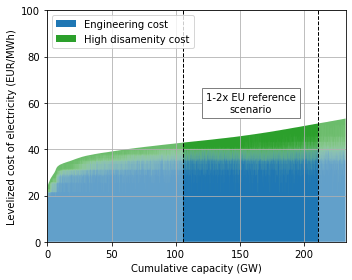

In [152]:
c = 'DE'

fig = plt.figure(figsize=[5,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = cumulative_capacity = tmp[c].cumsum() / 1000

ax = fig.add_subplot(111)

tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']
n = int(2.2*targets[c]/2*1000)
plt.fill_between(cumulative_capacity[:n], 0, engineering_cost[:n], label='Engineering cost')

disamenity_cost = tmp.sort_values('total')['total']
plt.fill_between(cumulative_capacity[:n], engineering_cost[:n], disamenity_cost[:n], label='High disamenity cost', facecolor='tab:green')

highlight(60)

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 2.2 * targets[c])
plt.ylim(0, 100)
plt.grid()
plt.legend(loc='upper left')

plt.tight_layout()
plt.savefig('Figure 6.png', dpi=300)

a = tmp.sort_values('engineering')['engineering'].iloc[:int(targets[c]/2*1000)].mean()
b_1 = tmp.sort_values('total')['engineering'].iloc[:int(targets[c]/2*1000)].mean()
print(f'1x EU Ref.: Engineering cost increase from {a} to {b} by {b/a}')

a = tmp.sort_values('engineering')['engineering'].iloc[:int(2*targets[c]/2*1000)].mean()
b_2 = tmp.sort_values('total')['engineering'].iloc[:int(2*targets[c]/2*1000)].mean()
print(f'2x EU Ref.: Engineering cost increase from {a} to {b} by {b/a}')

Exposure between 3.5 and 7.6
Exposure between 2.4 and 5.0
Reduction to 0.68 and 0.66
Exposure between 1.3 and 3.1
Reduction to 0.36 and 0.41


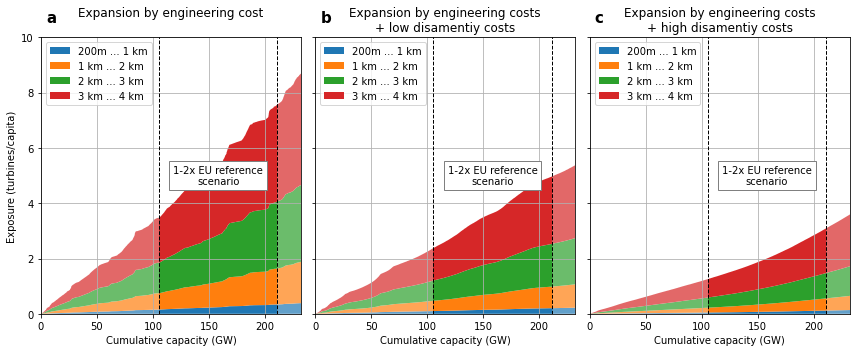

In [156]:
label_map = {
    1: '200m ... 1 km',
    2: '1 km ... 2 km',
    3: '2 km ... 3 km',
    4: '3 km ... 4 km',
}
tmp = turbines[turbines['DE']>0].copy()
cumulative_capacity = tmp['DE'].cumsum() / 1000

fig = plt.figure(figsize=[12,5])

ax1 = fig.add_subplot(131)
ax1.text(0.02, 1.1, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

tmp_eng = tmp.fillna(0).sort_values('engineering').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Exposure (turbines/capita)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost\n')
plt.grid()

a0 = bottom[int(targets[c]/2*1000)]
b0 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(a0, 1)} and {round(b0, 1)}')


ax2 = fig.add_subplot(132)
ax2.text(0.02, 1.1, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

tmp['total1'] = tmp['engineering'] + tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total1').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ low disamentiy costs')
plt.grid()

a1 = bottom[int(targets[c]/2*1000)]
b1 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(a1, 1)} and {round(b1, 1)}')
print(f'Reduction to {round(a1/a0, 2)} and {round(b1/b0, 2)}')


ax3 = fig.add_subplot(133)
ax3.text(0.02, 1.1, 'c', transform=ax3.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax3.set_yticklabels('')

tmp['total2'] = tmp['engineering'] + 10 * tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total2').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ high disamentiy costs')
plt.grid()

es_1 = bottom[int(targets[c]/2*1000)]
es_2 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(es_1, 1)} and {round(es_2, 1)}')
print(f'Reduction to {round(es_1/a0, 2)} and {round(es_2/b0, 2)}')


plt.tight_layout()
plt.savefig('Figure 7.png', dpi=300)

In [ ]:
tmp_eng = tmp.sort_values('engineering').iloc[:n].copy()
interactions = tmp_eng.sum()[range(1,5)].sum()
interactions / 1_000_000

In [ ]:
interactions / 80_000_000

In [ ]:
interactions / len(tmp_eng)

In [ ]:
interactions / len(tmp_eng) /3

In [ ]:
tmp_eng.mean()[range(1,5)].sum()

In [ ]:
tmp_eng

# Smart vs. dumb distancing

In [38]:
turbines_DE_1000m = pd.read_csv(f"../build/turbines-DE-1000m.csv", index_col=0)[
    ['lcoe_eur_per_mwh', 'disamenity_cost_eur_per_mwh', '1', '2', '3', '4']
]
turbines_DE_1000m.columns = ['engineering', 'disamenity', 1, 2, 3, 4]
#turbines_DE_1000m['disamenity'] = tmp['disamenity'] / 8
turbines_DE_1000m['DE'] = 2
turbines_DE_1000m

,engineering,disamenity,1,2,3,4,DE
0,25.180517,0.667652,32.05,454.05,1347.93,955.81,2
1,25.180517,0.450472,136.29,233.85,513.01,989.42,2
2,25.180517,0.667652,32.05,454.05,1347.93,955.81,2
3,25.180517,0.475215,151.68,194.12,574.11,1204.77,2
4,25.180517,0.679742,137.83,536.95,892.64,658.18,2
...,...,...,...,...,...,...,...
191256,64.614618,6.390578,411.70,1750.28,3833.45,3315.28,2
191257,64.614618,6.390578,411.70,1750.28,3833.45,3315.28,2
191258,64.614618,6.390578,411.70,1750.28,3833.45,3315.28,2
191259,64.614618,6.643230,162.24,2375.70,4425.92,1479.11,2


382.522


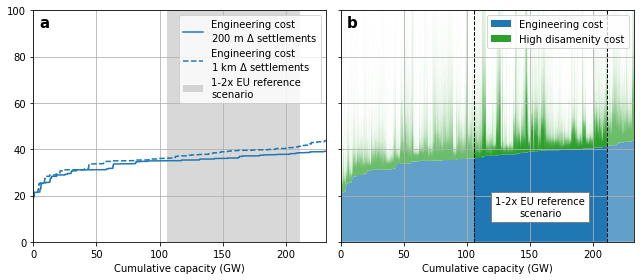

In [39]:
c = 'DE'

fig = plt.figure(figsize=[9,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = tmp[c].cumsum() / 1000
engineering_cost = tmp['engineering'].sort_values()

tmp_dumb = turbines_DE_1000m.copy()
cumulative_capacity_dumb = tmp_dumb[c].cumsum() / 1000
engineering_cost_dumb = tmp_dumb['engineering'].sort_values()
tmp_dumb['total'] = tmp_dumb['engineering'] + 10 * tmp_dumb['disamenity']
disamenity_cost_dumb = tmp_dumb.sort_values('engineering')['total']

print(cumulative_capacity_dumb.iloc[-1])

ax1 = fig.add_subplot(121)
ax1.text(0.02, 0.98, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

plt.fill_between([targets[c], 2*targets[c]], [0,0], [100,100], facecolor='grey', alpha=0.3, label='1-2x EU reference\nscenario')

plt.plot(cumulative_capacity, engineering_cost, label='Engineering cost\n200 m $\Delta$ settlements')

plt.plot(cumulative_capacity_dumb, engineering_cost_dumb, linestyle='--', color='tab:blue', label='Engineering cost\n1 km $\Delta$ settlements')

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.xticks(range(0, 210, 50))
plt.ylim(0, 100)
plt.grid()
plt.legend()


ax2 = fig.add_subplot(122)
ax2.text(0.02, 0.98, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')


#print(disamenity_cost.iloc[:n].mean())
plt.fill_between(cumulative_capacity_dumb, 0, engineering_cost_dumb, label='Engineering cost')
plt.fill_between(cumulative_capacity_dumb, engineering_cost_dumb, disamenity_cost_dumb, facecolor='tab:green', label='High disamenity cost')

highlight(15)

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 100)
plt.grid()
plt.legend()

plt.tight_layout()
#plt.savefig('Figure 8.png', dpi=300)

382.522


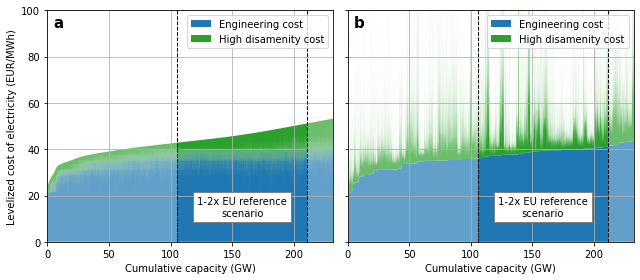

In [48]:
c = 'DE'

fig = plt.figure(figsize=[9,4])

tmp = turbines[turbines[c]>0].copy()
cumulative_capacity = tmp[c].cumsum() / 1000
tmp['total'] = tmp['engineering'] + 10 * tmp['disamenity']
engineering_cost = tmp.sort_values(['total', 'engineering'])['engineering']

tmp_dumb = turbines_DE_1000m.copy()
cumulative_capacity_dumb = tmp_dumb[c].cumsum() / 1000
engineering_cost_dumb = tmp_dumb['engineering'].sort_values()
tmp_dumb['total'] = tmp_dumb['engineering'] + 10 * tmp_dumb['disamenity']
disamenity_cost_dumb = tmp_dumb.sort_values('engineering')['total']

print(cumulative_capacity_dumb.iloc[-1])

ax1 = fig.add_subplot(121)
ax1.text(0.02, 0.98, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

plt.fill_between(cumulative_capacity, 0, engineering_cost, label='Engineering cost')

disamenity_cost = tmp.sort_values('total')['total']
plt.fill_between(cumulative_capacity, engineering_cost, disamenity_cost, label='High disamenity cost', facecolor='tab:green')

highlight(15)

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Levelized cost of electricity (EUR/MWh)')
plt.xlim(0, 2.2*targets[c])
plt.xticks(range(0, 210, 50))
plt.ylim(0, 100)
plt.grid()
plt.legend()


ax2 = fig.add_subplot(122)
ax2.text(0.02, 0.98, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')


#print(disamenity_cost.iloc[:n].mean())
plt.fill_between(cumulative_capacity_dumb, 0, engineering_cost_dumb, label='Engineering cost')
plt.fill_between(cumulative_capacity_dumb, engineering_cost_dumb, disamenity_cost_dumb, facecolor='tab:green', label='High disamenity cost')

highlight(15)

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 100)
plt.grid()
plt.legend()

plt.tight_layout()
#plt.savefig('Figure 8.png', dpi=300)

Exposure between 2.8 and 5.3
Exposure between 2.2 and 4.7
Reduction to 0.78 and 0.89
Exposure between 1.2 and 3.5
Reduction to 0.45 and 0.66


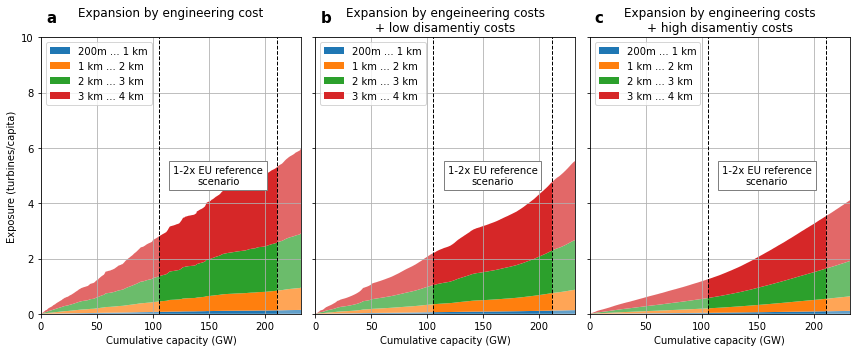

In [157]:
label_map = {
    1: '200m ... 1 km',
    2: '1 km ... 2 km',
    3: '2 km ... 3 km',
    4: '3 km ... 4 km',
}
tmp = turbines_DE_1000m.copy()
cumulative_capacity = tmp['DE'].cumsum() / 1000

fig = plt.figure(figsize=[12,5])

ax1 = fig.add_subplot(131)
ax1.text(0.02, 1.1, 'a', transform=ax1.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

tmp_eng = tmp.fillna(0).sort_values('engineering').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.ylabel('Exposure (turbines/capita)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost\n')
plt.grid()

a0 = bottom[int(targets[c]/2*1000)]
b0 = bottom[int(2*targets[c]/2*1000)]
ed_1, ed_2 = a0, b0
print(f'Exposure between {round(a0, 1)} and {round(b0, 1)}')


ax2 = fig.add_subplot(132)
ax2.text(0.02, 1.1, 'b', transform=ax2.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax2.set_yticklabels('')

tmp['total1'] = tmp['engineering'] + tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total1').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engeineering costs\n+ low disamentiy costs')
plt.grid()

a1 = bottom[int(targets[c]/2*1000)]
b1 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(a1, 1)} and {round(b1, 1)}')
print(f'Reduction to {round(a1/a0, 2)} and {round(b1/b0, 2)}')


ax3 = fig.add_subplot(133)
ax3.text(0.02, 1.1, 'c', transform=ax3.transAxes, fontsize=15, verticalalignment='top', fontweight="bold")
ax3.set_yticklabels('')

tmp['total2'] = tmp['engineering'] + 10 * tmp['disamenity']
tmp_eng = tmp.fillna(0).sort_values('total2').reset_index(drop=True)[list(range(1, 5))].cumsum() / 81_000_000

bottom = 0
for d in range(1, 5):
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[d], label=label_map[d])
    bottom += tmp_eng[d]

highlight()

plt.xlabel('Cumulative capacity (GW)')
plt.xlim(0, 2.2*targets[c])
plt.ylim(0, 10)

plt.legend(loc='upper left')
plt.title('Expansion by engineering costs\n+ high disamentiy costs')
plt.grid()

a1 = bottom[int(targets[c]/2*1000)]
b1 = bottom[int(2*targets[c]/2*1000)]
print(f'Exposure between {round(a1, 1)} and {round(b1, 1)}')
print(f'Reduction to {round(a1/a0, 2)} and {round(b1/b0, 2)}')


plt.tight_layout()
#plt.savefig('Figure 9.png', dpi=300)

In [158]:
kpi_dict = {
    'engineering': engineering_cost,
    'disamenity': disamenity_cost,
    'engineering dumb': engineering_cost_dumb,
    'disamenity dumb': disamenity_cost_dumb,
}
kpi =  pd.DataFrame({
    'full': {
        key: value.mean().round() for key, value in kpi_dict.items()
    },
    #'1x EU reference scenario (marginal)': {
    #    key: value.iloc[int(targets[c]/2*1000)].round(1) for key, value in kpis.items()
    #},
    #'2x EU reference scenario (marginal)': {
    #    key: value.iloc[int(targets[c]/2*1000*2)].round(1) for key, value in kpis.items()
    #},
    '1x EU reference scenario (mean)': {
        key: value.iloc[:int(targets[c]/2*1000)].mean().round(1) for key, value in kpi_dict.items()
    },
    '2x EU reference scenario (mean)': {
        key: value.iloc[:int(targets[c]/2*1000*2)].mean().round(1) for key, value in kpi_dict.items()
    }
})
kpi.loc['engineering smart'] = [0, b_1, b_2]
kpi.loc['exposure smart'] = [0, es_1, es_2]
kpi.loc['exposure dumb'] = [0, ed_1, ed_2]
kpi #/ tmp.loc['engineering']

,full,1x EU reference scenario (mean),2x EU reference scenario (mean)
engineering,42.0,33.200000,35.400000
disamenity,70.0,38.300000,42.400000
engineering dumb,42.0,32.500000,35.700000
disamenity dumb,60.0,44.200000,47.700000
engineering smart,0.0,33.162813,35.381611
exposure smart,0.0,1.254705,3.087816
exposure dumb,0.0,2.802962,5.320676


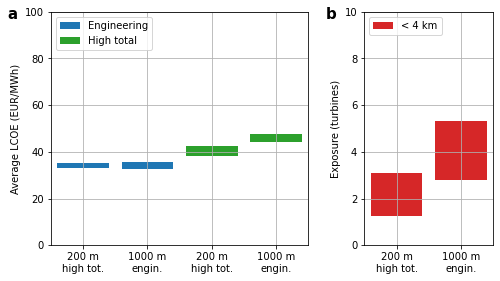

In [186]:
fig, ax = plt.subplots(1, 2, figsize=(7, 4), sharex='col', gridspec_kw={'width_ratios': [2, 1]})

ax[0].text(-0.17, 1.02, 'a', transform=ax[0].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

for i, df in enumerate([kpi.loc[['engineering smart', 'engineering dumb']], kpi.loc[['disamenity', 'disamenity dumb']]]):
    ax[0].bar(
        range(i*len(df), i*len(df)+len(df)),
        df['2x EU reference scenario (mean)']-df['1x EU reference scenario (mean)'],
        bottom=df['1x EU reference scenario (mean)'],
        color='tab:blue' if i==0 else 'tab:green',
        label='Engineering' if i==0 else 'High total'
    )
    
ax[0].set_xlim([-0.5, 3.5])
ax[0].set_xticks([0, 1, 2, 3])
ax[0].set_xticklabels(['200 m\nhigh tot.','1000 m\nengin.', '200 m\nhigh tot.','1000 m\nengin.'])
ax[0].set_ylim(0, 100)
ax[0].set_ylabel('Average LCOE (EUR/MWh)')
ax[0].grid()
ax[0].legend(loc='upper left')


ax[1].text(-0.3, 1.02, 'b', transform=ax[1].transAxes, fontsize=15, verticalalignment='top', fontweight="bold")

for i, df in enumerate([kpi.loc[['exposure smart', 'exposure dumb']]]):
    ax[1].bar(
        range(i*len(df), i*len(df)+len(df)),
        df['2x EU reference scenario (mean)']-df['1x EU reference scenario (mean)'],
        bottom=df['1x EU reference scenario (mean)'],
        color='tab:red',
        label='< 4 km'
    )
    
ax[1].set_xlim([-0.5, 1.5])
ax[1].set_xticks([0, 1])
ax[1].set_xticklabels(['200 m\nhigh tot.','1000 m\nengin.'])
ax[1].set_ylim(0, 10)
ax[1].set_ylabel('\nExposure (turbines)')
ax[1].grid()
ax[1].legend(loc='upper left')

plt.tight_layout()
plt.savefig('Figure 8.png', dpi=300)

# Cross country

In [60]:
df_countries = pd.concat([
    targets[countries], turbines[countries].sum()/1000
], keys=['target', 'potential'], axis=1)

<AxesSubplot:ylabel='1x EU reference scenario / potential'>

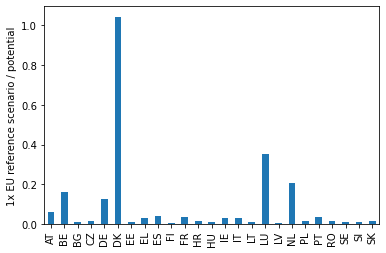

In [61]:
(df_countries['target'] / df_countries['potential']).plot(kind='bar', ylabel='1x EU reference scenario / potential')

In [109]:
results = pd.DataFrame()

for c in countries:
    
    tmp = turbines[turbines[c]>0].copy()
    tmp['total cost low'] = tmp['engineering'] + tmp['disamenity']
    tmp['total cost high'] = tmp['engineering'] + 10 * tmp['disamenity']
    results_c = pd.Series({
        'Technical potential (GW)': (tmp[c].sum() / 1000).round()
    })
    
    # Expansion target
    n = int(targets[c] * 1000 / 2)
    results_c['Expansion target (GW)'] = targets[c]
    
    # Average cost
    results_c['Average engineering cost (€/MWh)'] = tmp['engineering'].sort_values().iloc[:n].mean().round()
    results_c['Average total cost low (€/MWh)'] = tmp['total cost low'].sort_values().iloc[:n].mean().round()
    results_c['Increase in average cost low (%)'] = 100 * (results_c['Average total cost low (€/MWh)'] / results_c['Average engineering cost (€/MWh)'] - 1).round(2)
    results_c['Average total cost high (€/MWh)'] = tmp['total cost high'].sort_values().iloc[:n].mean().round()
    results_c['Increase in average cost high (%)'] = 100 * (results_c['Average total cost high (€/MWh)'] / results_c['Average engineering cost (€/MWh)'] - 1).round(2)
    
    # Exposure
    results_c['Exposure - expansion by engineering cost (capita/turbine)'] = (tmp.fillna(0).sort_values('engineering').iloc[:n][list(range(1, 5))].sum().sum() / n).round()
    results_c['Exposure - expansion by total cost high (capita/turbine)'] = (tmp.fillna(0).sort_values('total cost high').iloc[:n][list(range(1, 5))].sum().sum() / n).round()
    for i in range(1,5):
        results_c[f'{i}'] = (tmp.fillna(0).sort_values('total cost high').iloc[:n][i].sum() / n).round()
    
    results[c] = results_c

#results = results.sort_values('Average engineering cost (€/MWh)', axis=1)
results

,AT,BE,BG,CZ,DE,DK,EE,EL,ES,FI,...,LT,LU,LV,NL,PL,PT,RO,SE,SI,SK
Technical potential (GW),147.000000,42.000000,273.000000,236.000000,829.000000,9.000000,93.000000,298.000000,1531.000000,1334.000000,...,244.000000,2.000000,275.000000,106.000000,799.0000,339.000000,788.000000,1631.000000,24.00000,109.00000
Expansion target (GW),9.635319,7.313586,2.768476,3.846454,105.519338,9.937161,1.166831,9.932954,64.122135,9.319734,...,2.271274,0.630298,0.950137,25.198052,14.6953,11.990232,10.572279,14.511699,0.31227,1.82195
Average engineering cost (€/MWh),28.000000,29.000000,28.000000,30.000000,30.000000,23.000000,20.000000,22.000000,24.000000,23.000000,...,27.000000,31.000000,19.000000,27.000000,26.0000,22.000000,26.000000,21.000000,35.00000,26.00000
Average total cost low (€/MWh),28.000000,31.000000,28.000000,31.000000,31.000000,24.000000,20.000000,22.000000,24.000000,23.000000,...,27.000000,33.000000,19.000000,29.000000,27.0000,23.000000,26.000000,21.000000,37.00000,27.00000
Increase in average cost low (%),0.000000,7.000000,0.000000,3.000000,3.000000,4.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,6.000000,0.000000,7.000000,4.0000,5.000000,0.000000,0.000000,6.00000,4.00000
Average total cost high (€/MWh),33.000000,41.000000,28.000000,35.000000,36.000000,32.000000,20.000000,23.000000,25.000000,24.000000,...,28.000000,41.000000,19.000000,38.000000,29.0000,23.000000,27.000000,23.000000,42.00000,28.00000
Increase in average cost high (%),18.000000,41.000000,0.000000,17.000000,20.000000,39.000000,0.000000,5.000000,4.000000,4.000000,...,4.000000,32.000000,0.000000,41.000000,12.0000,5.000000,4.000000,10.000000,20.00000,8.00000
Exposure - expansion by engineering cost (capita/turbine),6899.000000,14757.000000,3897.000000,6022.000000,4516.000000,3314.000000,2388.000000,1359.000000,2019.000000,1682.000000,...,3801.000000,5728.000000,213.000000,12160.000000,3407.0000,8714.000000,2865.000000,3614.000000,3757.00000,6392.00000
Exposure - expansion by total cost high (capita/turbine),1644.000000,3313.000000,169.000000,1044.000000,1799.000000,3314.000000,158.000000,423.000000,311.000000,242.000000,...,421.000000,3568.000000,58.000000,3748.000000,1028.0000,168.000000,533.000000,528.000000,959.00000,961.00000
1,33.000000,127.000000,3.000000,19.000000,68.000000,148.000000,7.000000,13.000000,8.000000,10.000000,...,14.000000,116.000000,1.000000,112.000000,41.0000,6.000000,3.000000,24.000000,35.00000,12.00000


(0.0, 80.0)

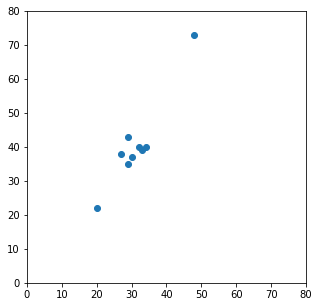

In [116]:
plt.figure(figsize=(5,5))
plt.scatter(results.loc['Average engineering cost (€/MWh)'], results.loc['Average total cost high (€/MWh)'])
plt.xlim(0, 80)
plt.ylim(0, 80)
plt.xlabel('Engineering cost (€/MWh)')
plt.xlabel('Engineering cost (€/MWh)')

In [152]:
pd.Series([3, np.nan]).mean()

3.0

In [149]:
import numpy as np

In [ ]:
pan

<Figure size 360x360 with 0 Axes>

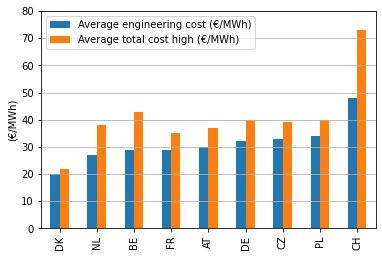

In [143]:
plt.figure(figsize=(5,5))
results.loc[['Average engineering cost (€/MWh)', 'Average total cost high (€/MWh)']].transpose().plot(kind='bar')
#plt.xlim(0, 80)
plt.ylim(0, 80)
plt.ylabel('(€/MWh)')
plt.grid(axis='y')

<Figure size 360x360 with 0 Axes>

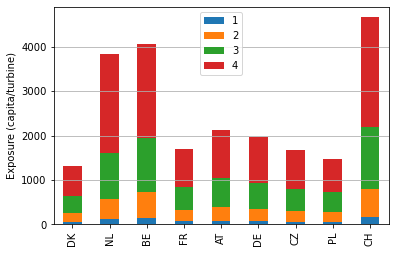

In [144]:
plt.figure(figsize=(5,5))
results.loc[[str(i) for i in range(1,5)]].transpose().plot(kind='bar', stacked=True)
#plt.xlim(0, 80)
#plt.ylim(0, 80)
plt.ylabel('Exposure (capita/turbine)')
plt.grid(axis='y')

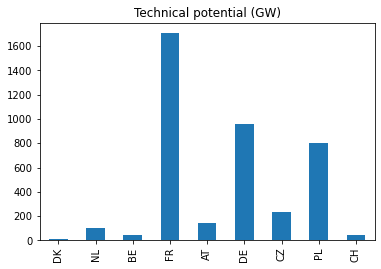

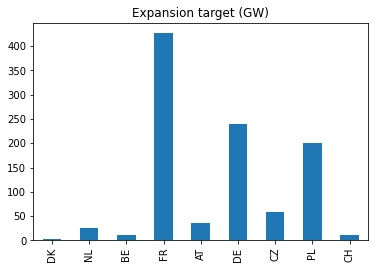

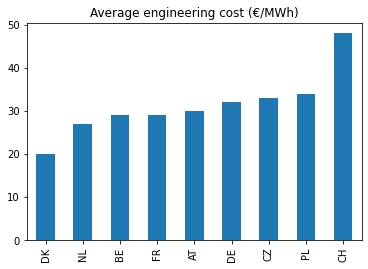

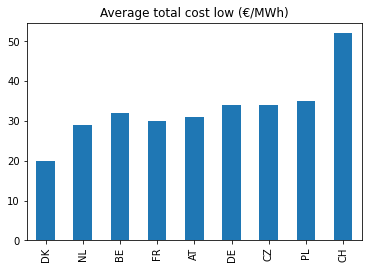

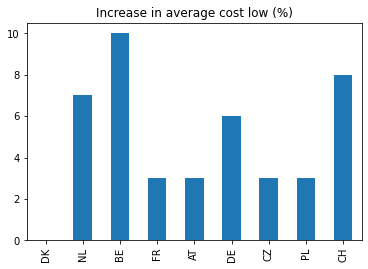

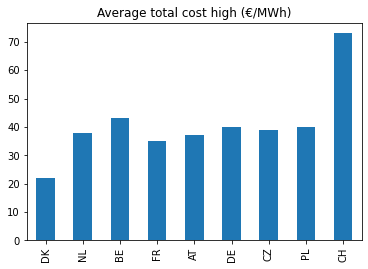

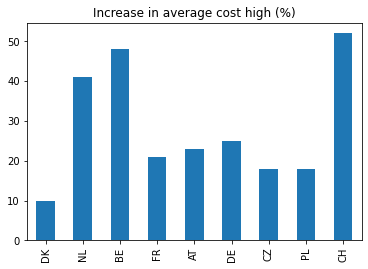

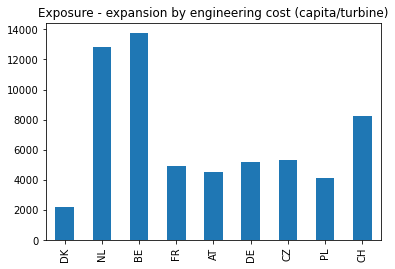

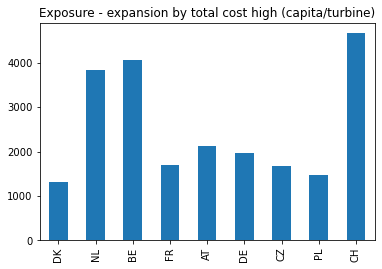

In [131]:
for param in results.index:
    plt.figure()
    results.loc[param].plot(kind='bar', title=param)
    plt.grid
    #plt.ylim(0,80)

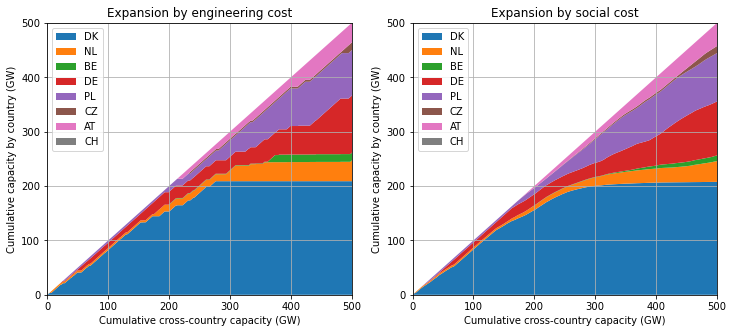

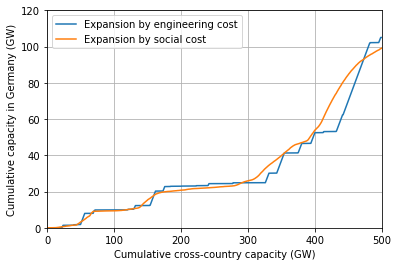

In [37]:
fig = plt.figure(figsize=[12,5])
ax = fig.add_subplot(121)

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_eng = turbines.fillna(0).sort_values('engineering').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_eng[c], label=c)
    bottom += tmp_eng[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by engineering cost')
plt.grid()

ax = fig.add_subplot(122)
#plt.figure(figsize=[6,5])

cumulative_capacity = [params['capacity'] / 1000 * x for x in range(len(turbines))]

tmp_soc = turbines.fillna(0).sort_values('total').reset_index(drop=True)[countries].cumsum() /1000

bottom = 0
for c in countries:
    plt.fill_between(cumulative_capacity, bottom, bottom+tmp_soc[c], label=c)
    bottom += tmp_soc[c]

plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity by country (GW)')
plt.xlim(0, 500)
plt.ylim(0, 500)

plt.legend(loc='upper left')
plt.title('Expansion by social cost')
plt.grid()

# DE only
expansion_DE = pd.concat([tmp_eng['DE'], tmp_soc['DE']], axis=1, keys=['Expansion by engineering cost', 'Expansion by social cost'])
expansion_DE.index = cumulative_capacity
expansion_DE.plot()
plt.xlabel('Cumulative cross-country capacity (GW)')
plt.ylabel('Cumulative capacity in Germany (GW)')
plt.xlim(0, 500)
plt.ylim(0, 120)
plt.grid()

(0.0, 20.0)

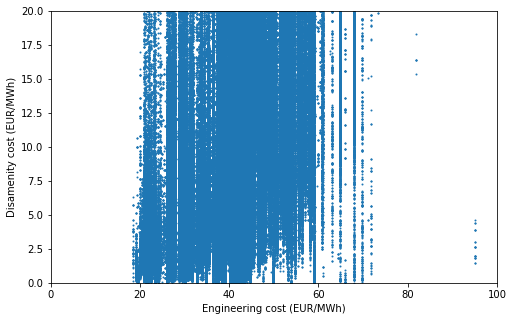

In [20]:
plt.figure(figsize=[8,5])

plt.scatter(turbines['engineering'], turbines['disamenity'], 1)

plt.xlabel('Engineering cost (EUR/MWh)')
plt.ylabel('Disamenity cost (EUR/MWh)')
plt.xlim(0, 100)
plt.ylim(0, 20)